In [6]:
# Final merger time for the reference systems with masses m_1 = 1e5 M_solar
# and m_2 = 1 M_solar, as a function of the initial 
# angular momentum j0 for binaries having Power Law PDF (1-1e5) for PBHs having alpha-disk 
# with dynamical friction (Ostriker) as dissipative force.

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma
from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces
import imripy.constants as c

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
solar_mass_to_pc = 4.8e-14
year_to_pc = 0.3064



π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



#1.) SystemProp(m1, m2, halo, D=D, inclination_angle = 0., pericenter_angle=0.,
# baryonicHalo=None, includeHaloInTotalMass=False):
    
#2.) EvolutionOptions(accuracy=1e-10, verbose=1, elliptic=True, m2_change=False,
# dissipativeForces=None, gwEmissionLoss = True, dynamicalFrictionLoss = True,
# considerRelativeVelocities=False, progradeRotation = True, **kwargs)

#3.) Evolve(sp, a_0, e_0=0., a_fin=0., t_0=0., t_fin=None, opt=EvolutionOptions())
# t_fin = None means t_fin = Time of coalescence on the system.


 
#4.) opt_0 = EvolutionOptions(accuracy=1e-10, verbose=1, elliptic=True, m2_change=False,
# dissipativeForces=None, gwEmissionLoss = True, dynamicalFrictionLoss = True,
# considerRelativeVelocities=False, progradeRotation = True)or 
# or
#4.) opt_0 = inspiral.Classic.EvolutionOptions(dynamicalFrictionLoss=False, verbose=1, accuracy=1e-10)

Evolving from  49754.76728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.3230s
Evolving from  41228.92832626267  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2992s
Evolving from  34164.05349010134  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2969s
Evolving from  28309.796015993354  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2914s
Evolving from  23458.70786964323  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy =

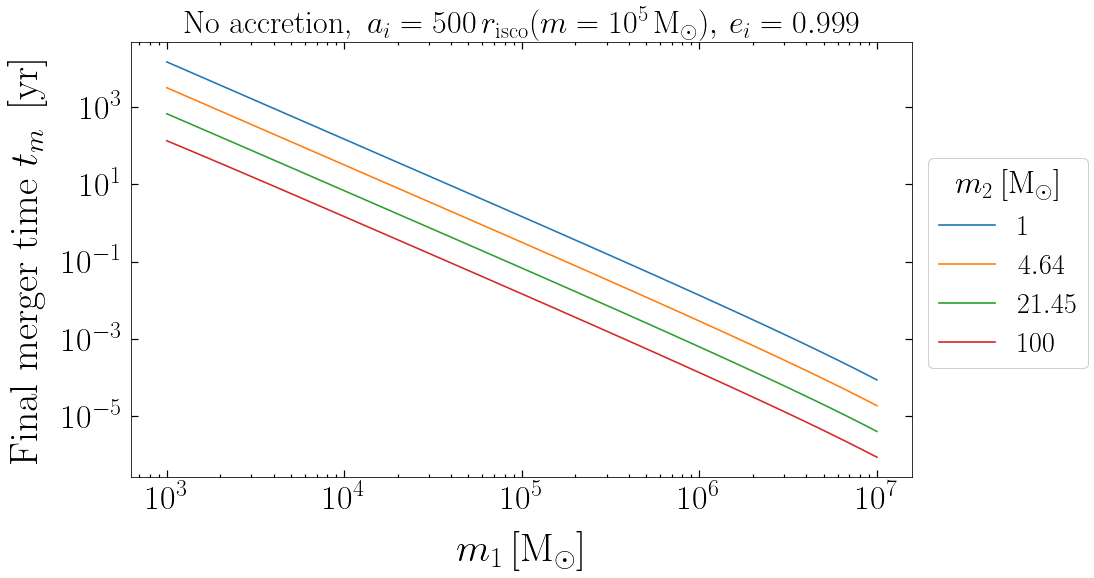

In [7]:
# Final merger time vs m1 for IMRI with no accretion disk losing energy only via
# emission of GW waves.



# Setting initial and final conditions of the binary evolution for an eccentric orbit
e0 = 0.999
m1_arr = np.geomspace(1e3, 1e7, 50)  # in units of solar mass
m2_arr = np.geomspace(1, 100, 4)  # in units of solar mass


fig,ax = plt.subplots(1, figsize = (14, 8))
plt.rc('lines', linewidth = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')

colors = ['C0', 'C1', 'C2', 'C3']
plot_lines = []

for k, (m2, color) in enumerate(zip(m2_arr, colors)):
    tm_arr_0 = np.zeros(len(m1_arr))
    for i, m1 in enumerate(m1_arr):
        m1 =  m1_arr[i] * solar_mass_to_pc  
        m2 =  m2_arr[k] * solar_mass_to_pc  
        D = 0
        a0  =  500 * ((6 * G * 1e5)/(c**2)) #  a_i = (500 * r_isco of 1e5 solar mass) in units of parsec
        accuracy = 1e-10
        
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
                    gwEmissionLoss = True, dynamicalFrictionLoss = False)
        R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=R_fin_0, opt=opt_0)   
        tm_arr_0[i] = ev_0.t[-1]/year_to_pc
        
        
    ax.loglog(m1_arr, tm_arr_0, color = color, linestyle = '-')
    slope_0, intercept_0 = np.polyfit(np.log(m1_arr), np.log(tm_arr_0), 1)
    print('\v')
    print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)
    
    
    
    
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
# In total 4x50 lines have been plotted
lines = ax.get_lines()
legend = plt.legend([lines[i] for i in [0,1,2,3]], ['$1$', r'$4.64$', 
           r'$21.45$', '$100$'], title = '$m_{2} \: \mathrm{[M_{\odot}]}$',
           title_fontsize = 32, loc = (1.02, 0.25), prop = {"size":28})


ax.add_artist(legend)

plt.xlabel('$m_{1} \, \mathrm{[M_{\odot}]}$', fontsize = 40, labelpad = 15)
plt.ylabel('Final merger time $t_{m} \,$  [yr]', fontsize = 40, labelpad = 15)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No accretion, $\, a_{i} = 500\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}}),\, e_{i} = 0.999$', fontsize = 32, pad = 9)
plt.savefig("tm_vs_m1_gw.pdf", bbox_inches = 'tight')
plt.show()   

Evolving from  4975.476728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2314s
Evolving from  4975.476728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2352s
Evolving from  4975.476728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2351s
Evolving from  4975.476728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.2338s
Evolving from  4975.476728558016  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 

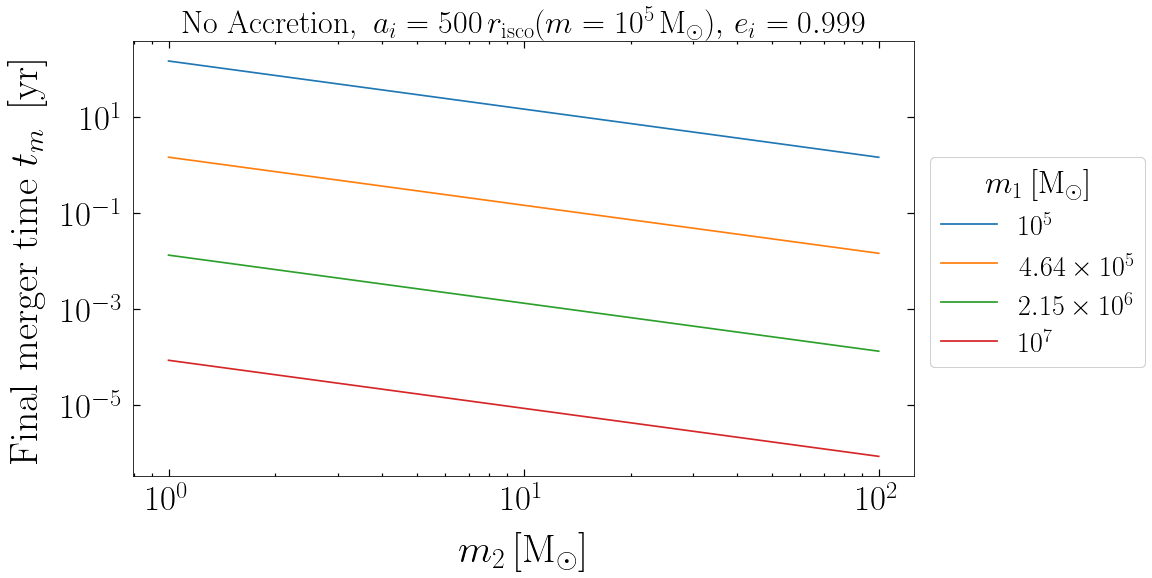

In [8]:
# Final merger time vs m2 for IMRI with α-accretion disk having dynamical 
# friction as the dissipative force.



# Setting initial and final conditions of the binary evolution for an eccentric orbit
e0 = 0.999
m1_arr = np.geomspace(1e4, 1e7, 4)  # in units of solar mass
m2_arr = np.geomspace(1, 100, 50)  # in units of solar mass


fig,ax = plt.subplots(1, figsize = (14, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')
colors = ['C0', 'C1', 'C2', 'C3']
plot_lines = []



for k, (m1, color) in enumerate(zip(m1_arr, colors)):
    tm_arr_0 = np.zeros(len(m2_arr))
    for i, m2 in enumerate(m2_arr):
        m1 =  m1_arr[k] * solar_mass_to_pc  
        m2 =  m2_arr[i] * solar_mass_to_pc  
        D = 0
        a0  =  500 * ((6 * G * 1e5)/(c**2)) #  a_i = (500 * r_isco of 1e5 solar mass) in units of parsec
        accuracy = 1e-10
        
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
                    gwEmissionLoss = True, dynamicalFrictionLoss = False)
        R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=R_fin_0, opt=opt_0)   
        tm_arr_0[i] = ev_0.t[-1]/year_to_pc
        
    
    ax.loglog(m2_arr, tm_arr_0, color = color,   linestyle = '-')
    slope_0, intercept_0 = np.polyfit(np.log(m2_arr), np.log(tm_arr_0), 1)
    print('\v')
    print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)
    
    
    
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
# In total 4x50 lines have been plotted
lines = ax.get_lines()
legend = plt.legend([lines[i] for i in [0,1,2,3]], ['$10^{5}$', r'$4.64\times 10^{5}$', 
           r'$2.15\times 10^{6}$', '$10^{7}$'], title = '$m_{1} \: \mathrm{[M_{\odot}]}$',
           title_fontsize = 32, loc = (1.02, 0.25), prop = {"size":28})
ax.add_artist(legend)


plt.xlabel('$m_{2} \, \mathrm{[M_{\odot}]}$', fontsize = 40, labelpad = 15)
plt.ylabel('Final merger time $t_{m}\,$  [yr]', fontsize = 40, labelpad = 15)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.title(r'No Accretion, $\, a_{i} = 500\,r_\mathrm{isco}(m = 10^{5}\, \mathrm{M_{\odot}}),\, e_{i} = 0.999$', fontsize = 32, pad = 9)
plt.savefig("tm_vs_m2_gw.pdf", bbox_inches = 'tight')
#plt.grid()
plt.show()   